<h3 "style=color:red" > <center> About the business problem


###### the data is about to fuel consumption based on the attributes in the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("MY2022 Fuel Consumption Ratings.csv")

In [4]:
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [6]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [7]:
data.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [8]:
data["Model Year"].value_counts()

2022    946
Name: Model Year, dtype: int64

In [9]:
data['Fuel Type'].value_counts()

Z    458
X    446
D     28
E     14
Name: Fuel Type, dtype: int64

In [10]:
x=data.drop(columns=['Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))','Model Year'])

In [11]:
x

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,230,5,7
...,...,...,...,...,...,...,...,...,...,...
941,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,219,5,5
942,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,219,5,5
943,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,232,5,7
944,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,236,5,5


In [12]:
y=data['Fuel Consumption (City (L/100 km)']

In [13]:
y

0       9.9
1      12.6
2      11.0
3      11.3
4      11.2
       ... 
941    10.7
942    10.5
943    11.0
944    11.5
945    12.4
Name: Fuel Consumption (City (L/100 km), Length: 946, dtype: float64

In [14]:
x.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

##### Univariate Analysis

It is used to analyse or describing about only one variable

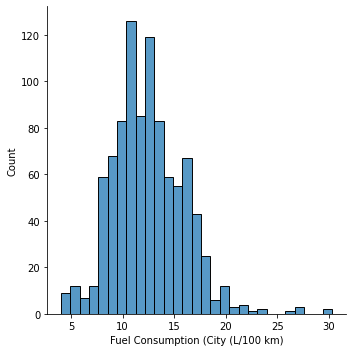

In [15]:
sns.displot(data["Fuel Consumption (City (L/100 km)"])
plt.show()

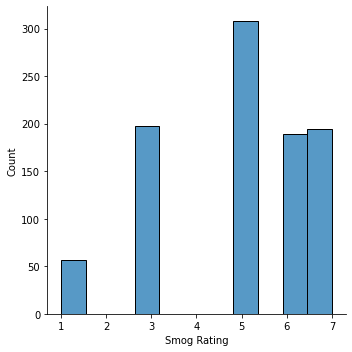

In [16]:
sns.displot(data['Smog Rating'])

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)'>

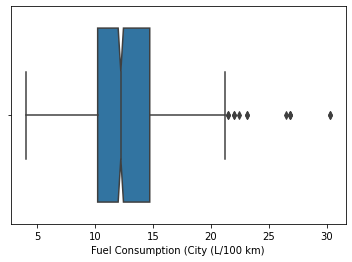

In [17]:
sns.boxplot(data["Fuel Consumption (City (L/100 km)"],notch=True)

In [18]:
data.head(1)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3


In [19]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

<AxesSubplot:xlabel='Engine Size(L)'>

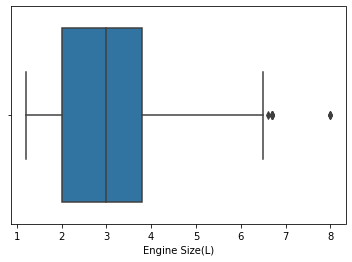

In [20]:
sns.boxplot(data['Engine Size(L)'])

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)'>

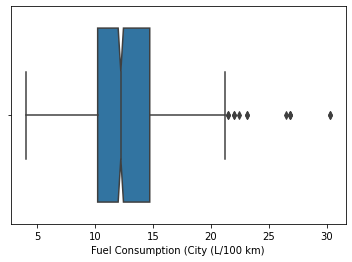

In [21]:
sns.boxplot(data["Fuel Consumption (City (L/100 km)"],notch=True)

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)'>

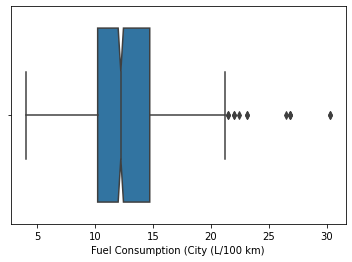

In [22]:
sns.boxplot(data["Fuel Consumption (City (L/100 km)"],notch=True)

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)'>

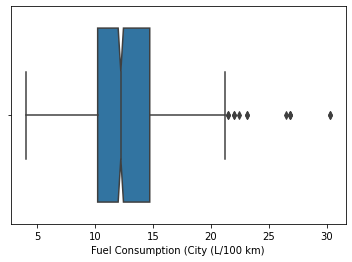

In [23]:
sns.boxplot(data["Fuel Consumption (City (L/100 km)"],notch=True)

##### Bivariate analysis

its is invole the anaysis of two variables,to describe the relation betweenthem

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption (City (L/100 km)'>

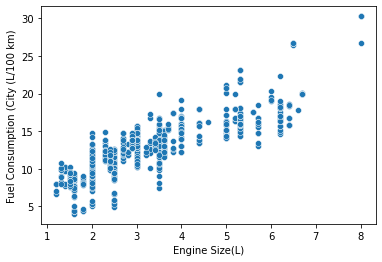

In [24]:
sns.scatterplot(x=data["Engine Size(L)"],y=data["Fuel Consumption (City (L/100 km)"])

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption (City (L/100 km)'>

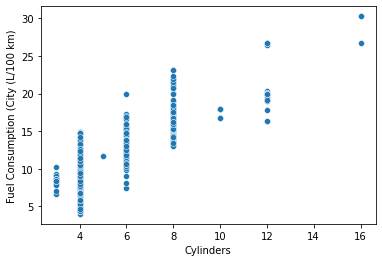

In [25]:
sns.scatterplot(x=data["Cylinders"],y=data["Fuel Consumption (City (L/100 km)"])

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption (City (L/100 km)'>

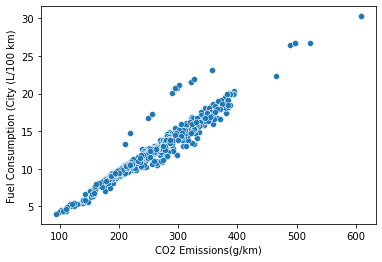

In [26]:
sns.scatterplot(x=data['CO2 Emissions(g/km)'],y=data["Fuel Consumption (City (L/100 km)"])

<AxesSubplot:xlabel='CO2 Rating', ylabel='Fuel Consumption (City (L/100 km)'>

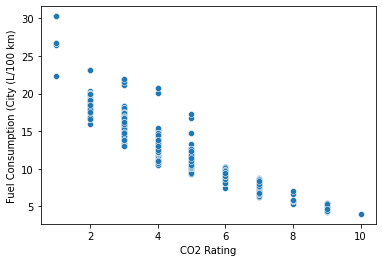

In [27]:
sns.scatterplot(x=data['CO2 Rating'],y=data["Fuel Consumption (City (L/100 km)"])

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption (City (L/100 km)'>

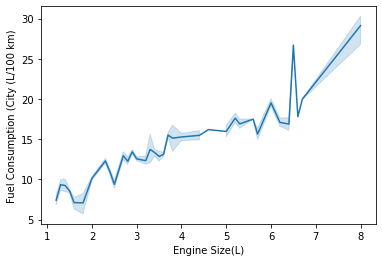

In [28]:
sns.lineplot(x=data["Engine Size(L)"],y=data["Fuel Consumption (City (L/100 km)"])

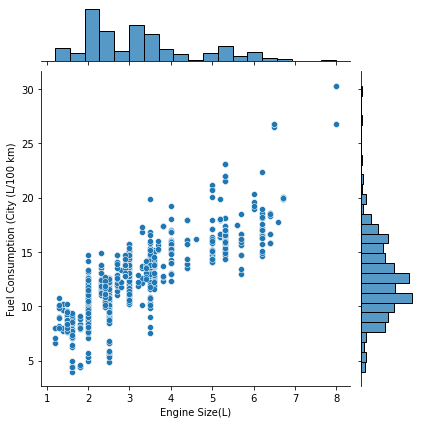

In [29]:
sns.jointplot(x=data["Engine Size(L)"],y=data["Fuel Consumption (City (L/100 km)"])

##### Multivariate analysis

the analysis of more than two variables is multivariate its describing relation among all the attributes in a data set

<AxesSubplot:>

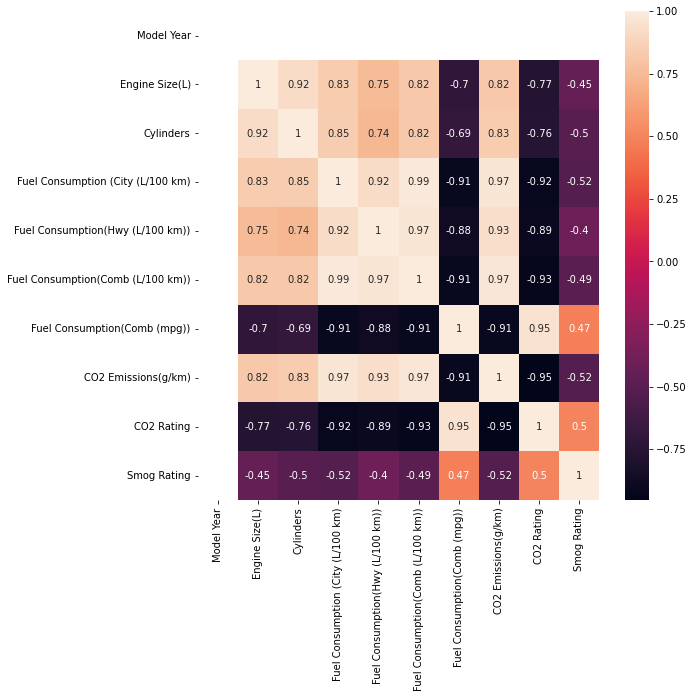

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)

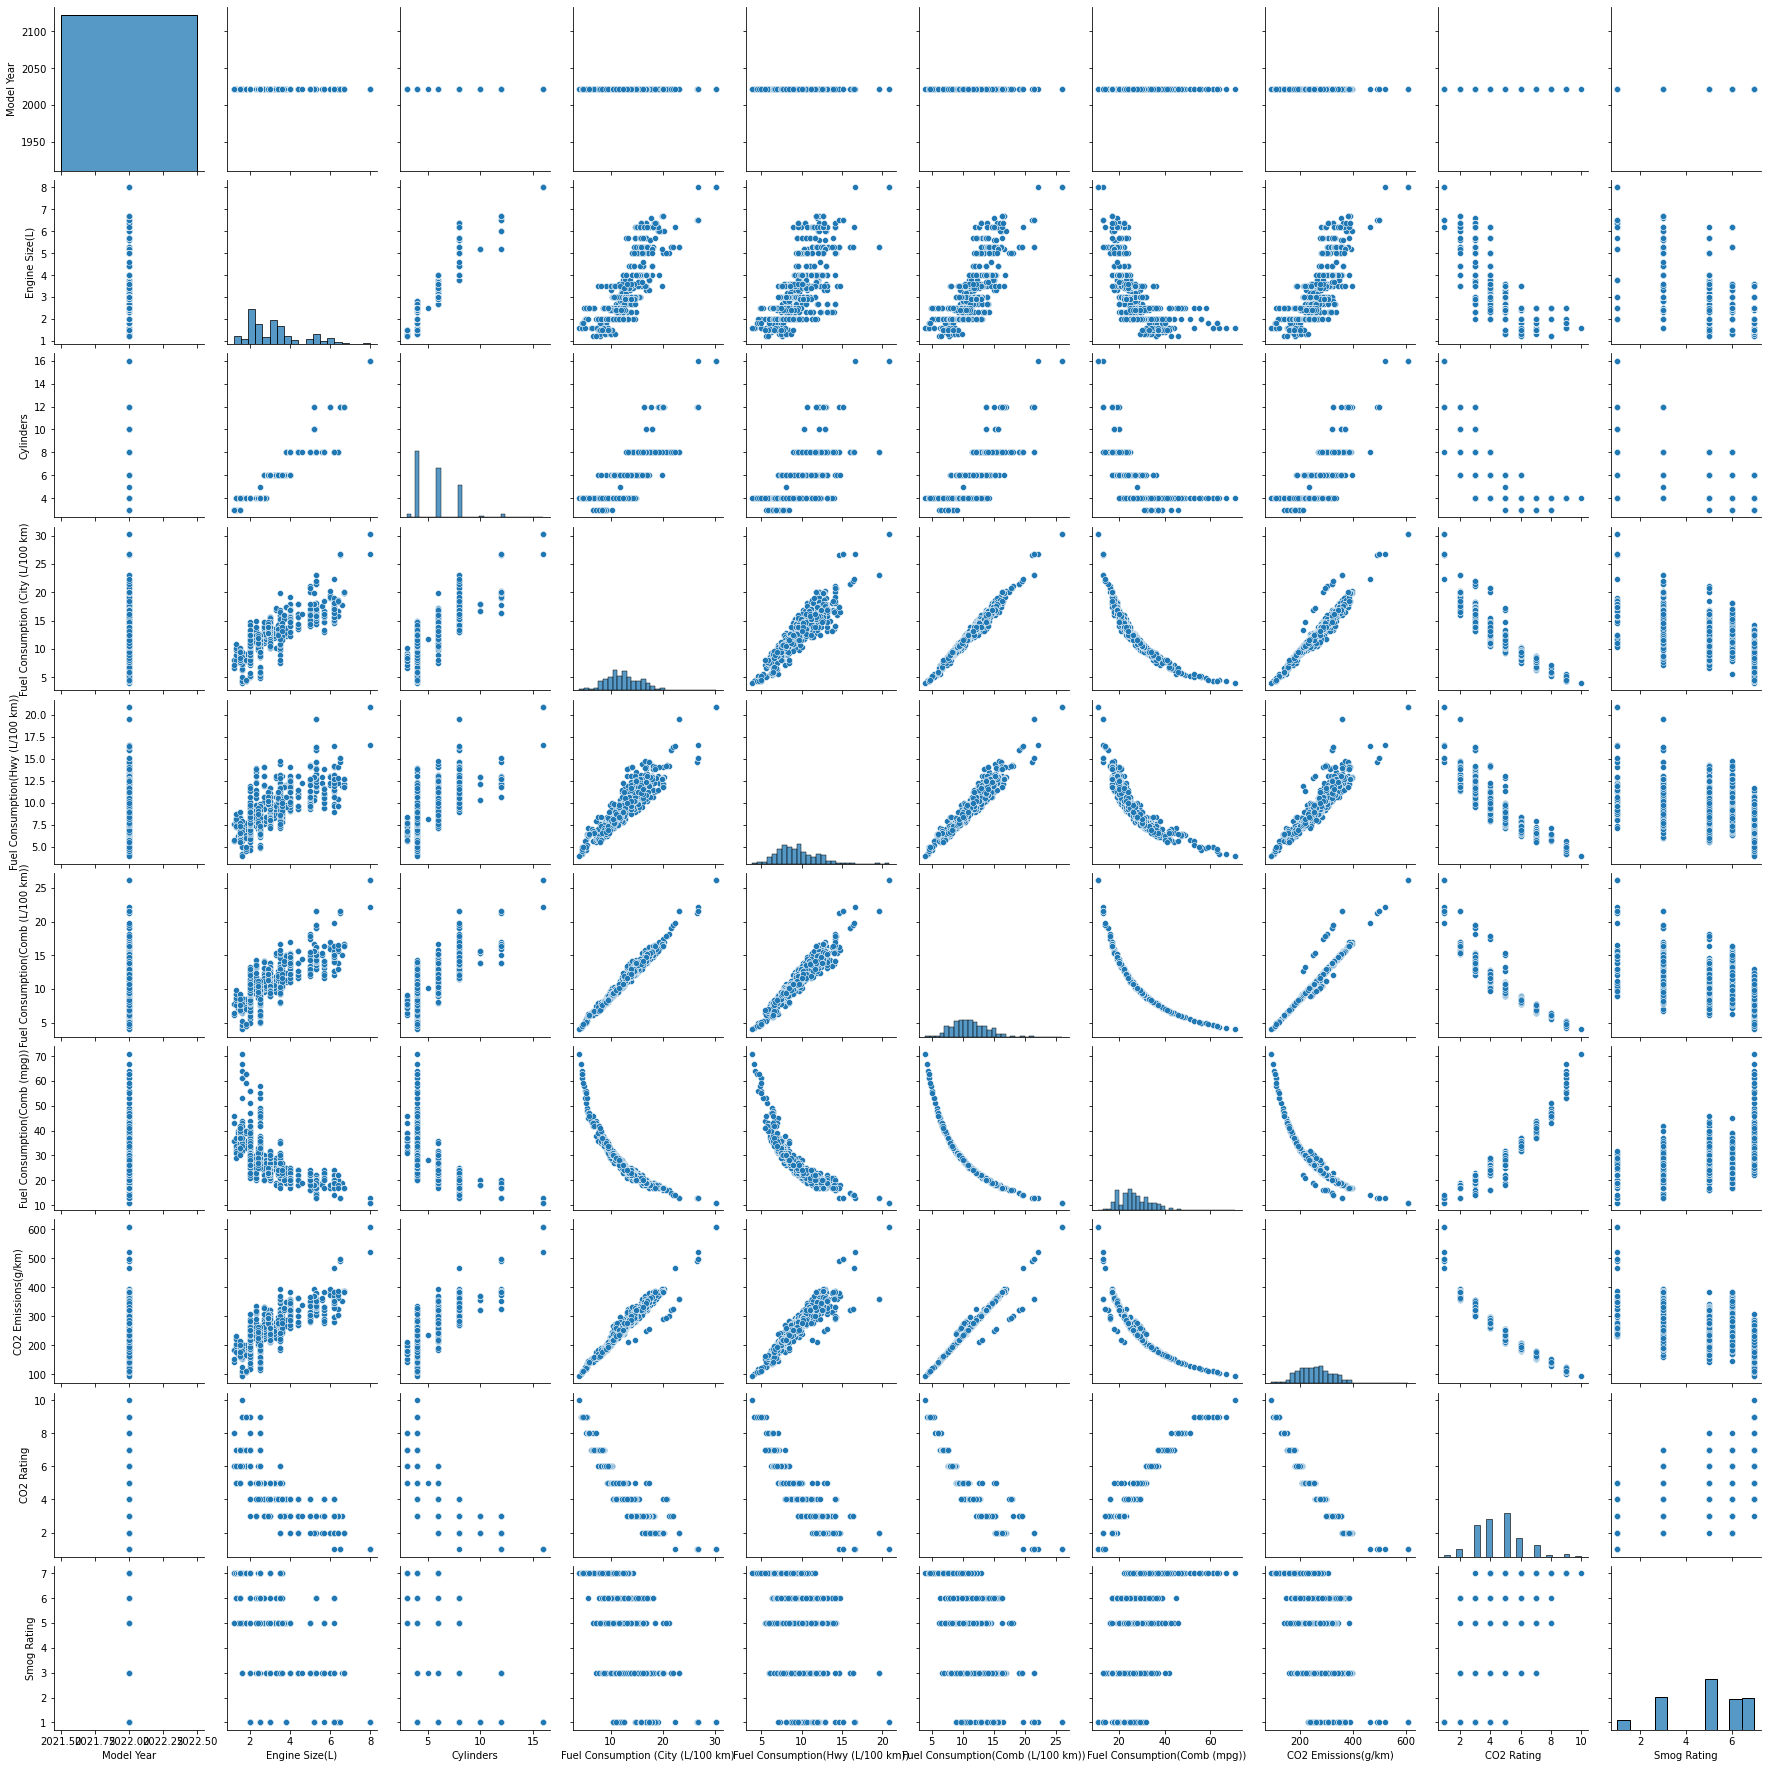

In [31]:
sns.pairplot(data)
plt.show()

###### Segregating object type and numerical columns 

In [32]:
obj=[]
num=[]
for i in data.columns:
    if type(data[i][0])==str:
        obj.append(i)
    else:
        num.append(i)

In [33]:
print('________the object type columns_________')
obj

________the object type columns_________


['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [34]:
print('__________the int type_________')
num

__________the int type_________


['Model Year',
 'Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']

In [35]:
data["Make"].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [36]:
len(data[data["Make"]=="Acura"])

8

In [37]:
Makelen=[]
for i in data['Make'].unique():
    x=len(data[data["Make"]==i])
    Makelen.append(x)

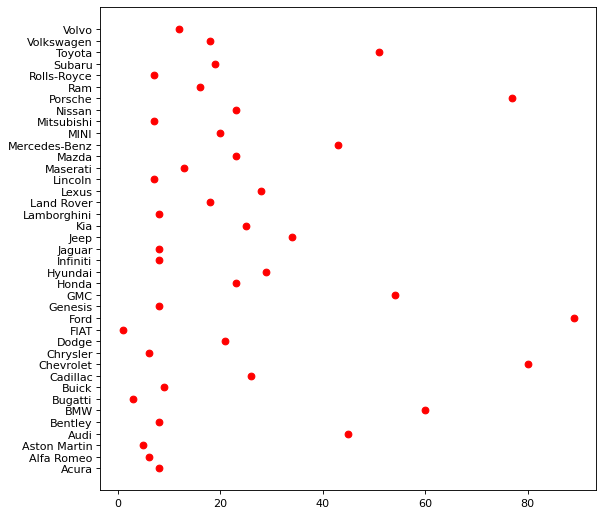

In [38]:
plt.figure(figsize=(8, 8),dpi=80)
plt.scatter(Makelen,data["Make"].unique(),color="red")
plt.show()

##### observation : in our data more vehicles are ford less are flat

##### Fuel type

In [39]:
data["Fuel Type"].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [40]:
Fuel=[]
for i in data['Fuel Type'].unique():
    x=len(data[data["Fuel Type"]==i])
    Fuel.append(x)

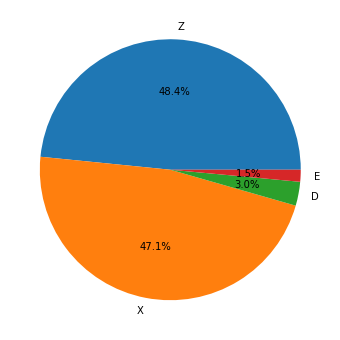

In [41]:
plt.figure(figsize=(6,6))
plt.pie(x=Fuel,labels=data["Fuel Type"].unique(),autopct="%1.1f%%")
plt.show()

In [42]:
Trans=[]
for i in data['Transmission'].unique():
    x=len(data[data["Transmission"]==i])
    Trans.append(x)

In [43]:
data.head(1)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3


In [44]:
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [45]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [46]:
data["Model Year"].unique()

array([2022], dtype=int64)

In [47]:
data.drop("Model Year",axis=1,inplace=True)

In [48]:
data["Make"].nunique()

39

In [49]:
data.dtypes

Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [50]:
m=['Make','Model','Vehicle Class',"Transmission","Fuel Type"]

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
for i in m:
    data[i]=le.fit_transform(data[[i]])

In [53]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,349,0,2.4,4,7,3,9.9,7.0,8.6,33,200,6,3
1,0,410,7,3.5,6,8,3,12.6,9.4,11.2,25,263,4,5
2,0,513,7,2.0,4,8,3,11.0,8.6,9.9,29,232,5,6
3,0,514,7,2.0,4,8,3,11.3,9.1,10.3,27,242,5,6
4,0,615,0,2.0,4,8,3,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,38,695,7,2.0,4,12,3,10.7,7.7,9.4,30,219,5,5
942,38,696,7,2.0,4,12,3,10.5,8.1,9.4,30,219,5,5
943,38,697,7,2.0,4,12,3,11.0,8.7,9.9,29,232,5,7
944,38,698,8,2.0,4,12,3,11.5,8.4,10.1,28,236,5,5


In [55]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption (City (L/100 km)',
       'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))',
       'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [56]:
x=data.drop(['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))',
'Fuel Consumption(Comb (mpg))'],axis=1)

In [57]:
x

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,349,0,2.4,4,7,3,200,6,3
1,0,410,7,3.5,6,8,3,263,4,5
2,0,513,7,2.0,4,8,3,232,5,6
3,0,514,7,2.0,4,8,3,242,5,6
4,0,615,0,2.0,4,8,3,230,5,7
...,...,...,...,...,...,...,...,...,...,...
941,38,695,7,2.0,4,12,3,219,5,5
942,38,696,7,2.0,4,12,3,219,5,5
943,38,697,7,2.0,4,12,3,232,5,7
944,38,698,8,2.0,4,12,3,236,5,5


In [58]:
y=data['Fuel Consumption(Comb (L/100 km))']

In [59]:
y

0       8.6
1      11.2
2       9.9
3      10.3
4       9.8
       ... 
941     9.4
942     9.4
943     9.9
944    10.1
945    10.8
Name: Fuel Consumption(Comb (L/100 km)), Length: 946, dtype: float64

###### Model building

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [62]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
model.score(x_train,y_train)

0.9949673946725927

In [74]:
model.score(x_test,y_test)

0.9900294409406141

In [65]:
train_pred=model.predict(x_train)

In [66]:
test_pred=model.predict(x_test)

###### Evalution

In [67]:
from sklearn.metrics import mean_squared_error
test_MSE=mean_squared_error(y_test,test_pred)
train_MSE=mean_squared_error(y_train,train_pred)

In [68]:
test_MSE

0.08508892605633768

In [69]:
train_MSE

0.04094074169184306